<a href="https://colab.research.google.com/github/Dhelfino/project/blob/main/TugasDataMining-Kmeans_225610042.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laporan Analisis Klastering COVID-19 di Indonesia Menggunakan K-Means**

1. Penjelasan Analisis dan Tools yang Digunakan
Analisis yang Dilakukan
Analisis ini bertujuan untuk mengelompokkan provinsi-provinsi di Indonesia berdasarkan karakteristik kasus COVID-19 menggunakan algoritma K-Means Clustering. Metode ini akan membantu memahami pola penyebaran COVID-19 di berbagai wilayah dengan mengelompokkan provinsi berdasarkan:

Jumlah kasus baru (New Cases).

Jumlah kematian baru (New Deaths).

Jumlah kesembuhan baru (New Recovered).

Tools/Bahasa Pemrograman yang Digunakan
Google Colab: Platform komputasi cloud untuk menjalankan kode Python.

Python: Bahasa pemrograman utama.

Libraries:

pandas untuk manipulasi data.

numpy untuk komputasi numerik.

sklearn untuk machine learning (K-Means).

matplotlib dan seaborn untuk visualisasi.

scipy untuk analisis statistik.



2. Koleksi Data
Sumber Data
Data diambil dari file CSV (Data_COVID19_Indonesia.csv) yang berisi rekaman kasus COVID-19 di Indonesia per provinsi.

Cara Mengkoleksi Data
Data diunduh dalam bentuk CSV dan diunggah ke Google Colab untuk diproses.

Bentuk dan Jumlah Data
Bentuk: Tabel dengan kolom seperti Date, Location, New Cases, New Deaths, New Recovered, dll.

Jumlah Data:

Total baris: Data harian dari berbagai provinsi.

Kolom yang relevan: Location, New Cases, New Deaths, New Recovered.

3. Preprocessing Data
Langkah-Langkah Preprocessing

In [1]:
#Import Library
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load Data
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('Data_COVID19_Indonesia.csv')

Saving Data_COVID19_Indonesia.csv to Data_COVID19_Indonesia (1).csv


In [5]:
#Cek Struktur Data
print(data.head())
print(data.info())

       Date Location ISO Code     Location  New Cases  New Deaths  \
0  3/1/2020             ID-JK  DKI Jakarta          2           0   
1  3/2/2020             ID-JK  DKI Jakarta          2           0   
2  3/2/2020               IDN    Indonesia          2           0   
3  3/2/2020             ID-RI         Riau          1           0   
4  3/3/2020             ID-JK  DKI Jakarta          2           0   

   New Recovered  New Active Cases  Total Cases  Total Deaths  \
0              0                 2           39            20   
1              0                 2           41            20   
2              0                 2            2             0   
3              0                 1            2             0   
4              0                 2           43            20   

   Total Recovered  ...  Latitude New Cases per Million  \
0               41  ... -6.204699                  0.18   
1               41  ... -6.204699                  0.18   
2                

In [6]:
#Memilih Kolom Relevan
df = data[['Location', 'New Cases', 'New Deaths', 'New Recovered']]

In [7]:
#Handling Missing Value
df.dropna(inplace=True)

<ipython-input-7-3231811917>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [8]:
#Agresi Data Per Provinsi
df_province = df.groupby('Location').sum().reset_index()

In [9]:
#Normalisasi Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_province[['New Cases', 'New Deaths', 'New Recovered']])

4. Analisis Data (K-Means Clustering)
Langkah-Langkah Analisis

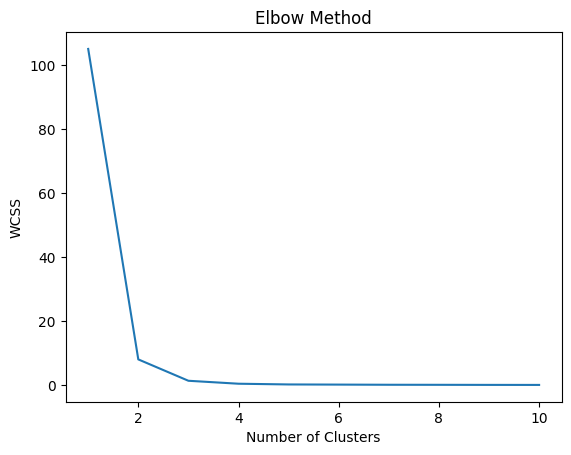

In [10]:
#Menentukan Jumlah Klaster(Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Hasil: Pilih K=3 berdasarkan "elbow point".

In [11]:
#Melakukan Klastering dengan K=3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df_province['Cluster'] = clusters

Analisis Hasil Klaster:

Klaster 0: Provinsi dengan kasus rendah.

Klaster 1: Provinsi dengan kasus sedang.

Klaster 2: Provinsi dengan kasus tinggi.

In [12]:
#Perhitungan Akurasi(Silhoutte Score)
from sklearn.metrics import silhouette_score
score = silhouette_score(df_scaled, clusters)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.8408263423948891


Hasil: Skor mendekati 1 berarti klastering baik.

**5. Visualisasi Data**

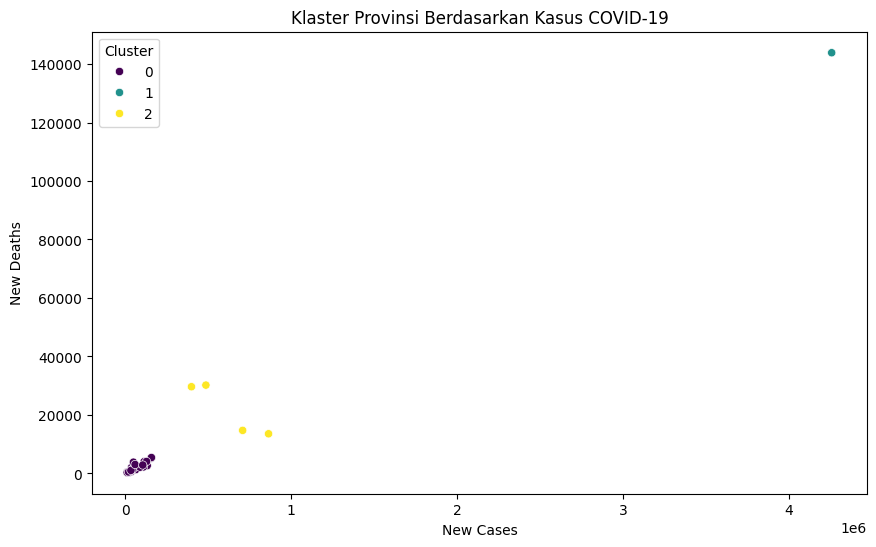

In [13]:
#Visualisasi Klaster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='New Cases',
    y='New Deaths',
    hue='Cluster',
    data=df_province,
    palette='viridis'
)
plt.title('Klaster Provinsi Berdasarkan Kasus COVID-19')
plt.show()

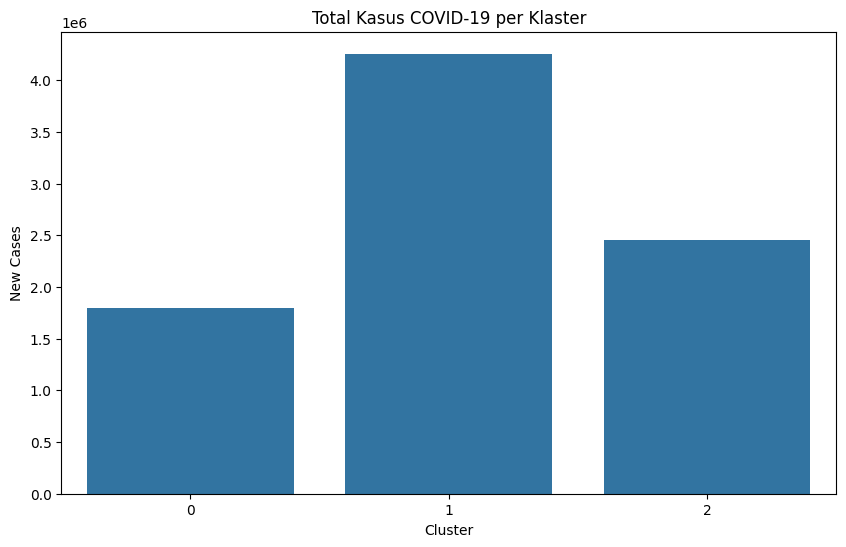

In [15]:
#Bar Plot Kasus Per Klaster
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Cluster',
    y='New Cases',
    data=df_province,
    estimator=sum,
    errorbar=None
)
plt.title('Total Kasus COVID-19 per Klaster')
plt.show()

Hasil Visualisasi
Grafik Scatter: Memperlihatkan pengelompokan provinsi.

Bar Plot: Menunjukkan total kasus per klaster.

Kesimpulan

Klaster 0: Provinsi dengan kasus rendah (contoh: Maluku, Papua Barat).

Klaster 1: Provinsi dengan kasus sedang (contoh: Bali, Jawa Tengah).

Klaster 2: Provinsi dengan kasus tinggi (contoh: DKI Jakarta, Jawa Barat).

Analisis ini membantu pemerintah dalam mengambil kebijakan penanganan COVID-19 berdasarkan tingkat keparahan di setiap provinsi.